In [544]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [545]:
creq = pd.read_csv("CashRequest.csv")
fees = pd.read_csv("Fees.csv")

In [546]:
creq.head()

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
1,70,100.0,rejected,2019-12-10 19:50:12.34778+00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
2,7,100.0,rejected,2019-12-10 19:13:35.82546+00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN


In [547]:
#Buscamos índices vacíos y los eliminamos
creq.loc[creq['id'].isna(),['id','amount','status','created_at']]

,id,amount,status,created_at


In [548]:
#No hay, y en otros datos clave corresponde con el uso que se espera de la base:
pd.isna(creq).sum(),creq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          23970 non-null  int64  
 1   amount                      23970 non-null  float64
 2   status                      23970 non-null  object 
 3   created_at                  23970 non-null  object 
 4   updated_at                  23970 non-null  object 
 5   user_id                     21867 non-null  float64
 6   moderated_at                16035 non-null  object 
 7   deleted_account_id          2104 non-null   float64
 8   reimbursement_date          23970 non-null  object 
 9   cash_request_received_date  16289 non-null  object 
 10  money_back_date             16543 non-null  object 
 11  transfer_type               23970 non-null  object 
 12  send_at                     16641 non-null  object 
 13  recovery_status             333

(id                                0
 amount                            0
 status                            0
 created_at                        0
 updated_at                        0
 user_id                        2103
 moderated_at                   7935
 deleted_account_id            21866
 reimbursement_date                0
 cash_request_received_date     7681
 money_back_date                7427
 transfer_type                     0
 send_at                        7329
 recovery_status               20640
 reco_creation                 20640
 reco_last_update              20640
 dtype: int64,
 None)

In [549]:
# Convertimos campos de fecha a tipo fecha para poder hacer operaciones de fecha
cols = ['created_at','updated_at','moderated_at','reimbursement_date','cash_request_received_date','money_back_date','send_at','reco_creation','reco_last_update']
cols = ['created_at','updated_at']  # De entrada sólo podemos estos dos, el resto da error de formato, 
                                    # si lo necesitamos ya volveremos sobre ello.
for col in cols:
    creq[col] = pd.to_datetime(creq[col])
creq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   id                          23970 non-null  int64              
 1   amount                      23970 non-null  float64            
 2   status                      23970 non-null  object             
 3   created_at                  23970 non-null  datetime64[ns, UTC]
 4   updated_at                  23970 non-null  datetime64[ns, UTC]
 5   user_id                     21867 non-null  float64            
 6   moderated_at                16035 non-null  object             
 7   deleted_account_id          2104 non-null   float64            
 8   reimbursement_date          23970 non-null  object             
 9   cash_request_received_date  16289 non-null  object             
 10  money_back_date             16543 non-null  object        

In [550]:
fees.head(2)

,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
0,6537,14941.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 14941,2020-09-07 10:47:27.42315+00,2020-10-13 14:25:09.396112+00,2020-12-17 14:50:07.47011+00,NaN,NaN,after
1,6961,11714.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-09-09 20:51:17.998653+00,2020-10-13 14:25:15.537063+00,2020-12-08 17:13:10.45908+00,NaN,NaN,after


In [551]:
# Miramos en fees y hay 4 índices de cash_request que faltan, luego veremos si lo arreglamos. 
# El resto de vacíos no afectan a la integridad, simplemente no hay dato.
pd.isna(fees).sum()

id                     0
cash_request_id        4
type                   0
status                 0
category           18865
total_amount           0
reason                 0
created_at             0
updated_at             0
paid_at             5530
from_date          13295
to_date            13295
charge_moment          0
dtype: int64

In [552]:
# Miramos los tipos de datos por si hemos de consultarlos al hacer operaciones
fees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21061 entries, 0 to 21060
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               21061 non-null  int64  
 1   cash_request_id  21057 non-null  float64
 2   type             21061 non-null  object 
 3   status           21061 non-null  object 
 4   category         2196 non-null   object 
 5   total_amount     21061 non-null  float64
 6   reason           21061 non-null  object 
 7   created_at       21061 non-null  object 
 8   updated_at       21061 non-null  object 
 9   paid_at          15531 non-null  object 
 10  from_date        7766 non-null   object 
 11  to_date          7766 non-null   object 
 12  charge_moment    21061 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.1+ MB


In [553]:
# Convertimos campos de fecha a tipo fecha para poder hacer operaciones de fecha
cols = ['created_at','updated_at']  
for col in cols:
    fees[col] = pd.to_datetime(fees[col])
fees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21061 entries, 0 to 21060
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   id               21061 non-null  int64              
 1   cash_request_id  21057 non-null  float64            
 2   type             21061 non-null  object             
 3   status           21061 non-null  object             
 4   category         2196 non-null   object             
 5   total_amount     21061 non-null  float64            
 6   reason           21061 non-null  object             
 7   created_at       21061 non-null  datetime64[ns, UTC]
 8   updated_at       21061 non-null  datetime64[ns, UTC]
 9   paid_at          15531 non-null  object             
 10  from_date        7766 non-null   object             
 11  to_date          7766 non-null   object             
 12  charge_moment    21061 non-null  object             
dtypes: datetime64[ns

In [554]:
creq.describe(),"-"*70,fees.describe()

(                 id        amount        user_id  deleted_account_id
 count  23970.000000  23970.000000   21867.000000         2104.000000
 mean   13910.966124     82.720818   32581.250789         9658.755228
 std     7788.117214     26.528065   27618.565773         7972.743249
 min        3.000000      1.000000      34.000000           91.000000
 25%     7427.250000     50.000000   10804.000000         3767.000000
 50%    14270.500000    100.000000   23773.000000         6121.500000
 75%    20607.750000    100.000000   46965.000000        16345.000000
 max    27010.000000    200.000000  103719.000000        30445.000000,
 '----------------------------------------------------------------------',
                  id  cash_request_id  total_amount
 count  21061.000000     21057.000000  21061.000000
 mean   10645.355111     16318.449162      5.000237
 std     6099.315256      6656.149949      0.034453
 min        1.000000      1456.000000      5.000000
 25%     5385.000000     11745.000

In [555]:
creq['amount'].sum(), fees['total_amount'].sum()

(1982818.0, 105310.0)

In [556]:
#vemos que hay 21867 peticiones con usuarios con cuenta activa (+2104 si sumamos los que ya no tienen = 23971)
len(creq['user_id'].unique().tolist()), len(creq['deleted_account_id'].unique().tolist()) 

(10799, 1142)

In [557]:
#Vemos que hay repetidos
#Lo mismo con Pandas
creq.nunique()

id                            23970
amount                           41
status                            7
created_at                    23970
updated_at                    23970
user_id                       10798
moderated_at                  16035
deleted_account_id             1141
reimbursement_date             4089
cash_request_received_date      312
money_back_date               12221
transfer_type                     2
send_at                       16641
recovery_status                   4
reco_creation                  3330
reco_last_update               3330
dtype: int64

In [558]:
#Veamos otros datos con las opciones que las categorizan
np.sort(creq['status'].unique())


array(['active', 'canceled', 'direct_debit_rejected', 'direct_debit_sent',
       'money_back', 'rejected', 'transaction_declined'], dtype=object)

In [559]:
#Con comprensión ...
{col: creq[col].unique() for col in ['status','transfer_type','recovery_status']}

{'status': array(['rejected', 'money_back', 'canceled', 'active',
        'direct_debit_rejected', 'transaction_declined',
        'direct_debit_sent'], dtype=object),
 'transfer_type': array(['regular', 'instant'], dtype=object),
 'recovery_status': array([nan, 'completed', 'pending', 'pending_direct_debit', 'cancelled'],
       dtype=object)}

In [560]:
#En recovery_status hay un valor ue no está en el léxico:  'cancelled', que correspnde a un 'transaction_declined'
creq['recovery_status'].value_counts()

recovery_status
completed               2468
pending                  845
pending_direct_debit      16
cancelled                  1
Name: count, dtype: int64

In [561]:
#correspnde a un 'transaction_declined'
creq[creq['recovery_status'] == 'cancelled']

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
10868,23127,100.0,transaction_declined,2020-10-22 15:45:55.449352+00:00,2020-12-23 17:31:58.564319+00:00,83479.0,NaN,NaN,2020-11-01 23:51:00+00,NaN,2020-11-08 22:25:14+00,instant,2020-10-22 15:46:13+00,cancelled,2020-11-08 22:25:11.155135+00,2021-01-04 11:09:57.813744+00


In [562]:
creq['status'].value_counts()

status
money_back               16397
rejected                  6568
direct_debit_rejected      831
active                      59
transaction_declined        48
direct_debit_sent           34
canceled                    33
Name: count, dtype: int64

In [563]:
creq[creq['status'] == 'transaction_declined']['recovery_status'].unique()

array([nan, 'cancelled'], dtype=object)

In [564]:
#Si todos los demás son NAN podemos pasar cancelled a NAN para que no cree casos que no hay
creq.loc[creq['recovery_status'] == 'cancelled','status']=np.nan
creq[creq['status'] == 'transaction_declined']['recovery_status'].unique()

array([nan], dtype=object)

In [565]:
fees.nunique()

id                 21061
cash_request_id    12933
type                   3
status                 4
category               2
total_amount           2
reason             15149
created_at         21026
updated_at         21061
paid_at            15529
from_date           1084
to_date             1560
charge_moment          2
dtype: int64

In [566]:
{col: fees[col].unique() for col in ['type','status','category','charge_moment']}

{'type': array(['instant_payment', 'incident', 'postpone'], dtype=object),
 'status': array(['rejected', 'accepted', 'cancelled', 'confirmed'], dtype=object),
 'category': array([nan, 'rejected_direct_debit', 'month_delay_on_payment'],
       dtype=object),
 'charge_moment': array(['after', 'before'], dtype=object)}

In [567]:
#Conectamos los dos DataFrames para ver su integridad y vínculo, hay un índice de creq en fees
df=pd.merge(creq, fees, left_on='id', right_on='cash_request_id', how='left', suffixes = ["_creq", "_fees"])
print(len(df))
df.head(2)

32094


,id_creq,amount,status_creq,created_at_creq,updated_at_creq,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,...,status_fees,category,total_amount,reason,created_at_fees,updated_at_fees,paid_at,from_date,to_date,charge_moment
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00:00,2019-12-11 16:47:42.407830+00:00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,...,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN
1,70,100.0,rejected,2019-12-10 19:50:12.347780+00:00,2019-12-11 14:24:22.900054+00:00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,...,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN


In [568]:
df.sort_values(by='id_creq')

,id_creq,amount,status_creq,created_at_creq,updated_at_creq,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,...,status_fees,category,total_amount,reason,created_at_fees,updated_at_fees,paid_at,from_date,to_date,charge_moment
8778,3,1.0,canceled,2019-11-19 13:57:53.511561+00:00,2020-12-14 10:25:57.710844+00:00,47.0,2019-11-20 12:16:50+00,NaN,2019-12-05 23:00:00+00,NaN,...,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN
8013,4,100.0,money_back,2019-12-09 14:47:35.190714+00:00,2020-11-04 12:54:52.120014+00:00,NaN,2019-12-09 14:58:28+00,1309.0,2019-12-16 23:00:00+00,NaN,...,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00:00,2019-12-11 16:47:42.407830+00:00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,...,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN
11860,6,100.0,direct_debit_rejected,2019-12-10 19:05:48.921042+00:00,2020-12-18 22:47:47.993817+00:00,812.0,2019-12-11 09:40:33+00,NaN,2020-02-05 23:00:00+00,2019-12-11,...,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN
2,7,100.0,rejected,2019-12-10 19:13:35.825460+00:00,2019-12-11 09:46:59.779773+00:00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,...,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24016,27006,50.0,money_back,2020-11-01 23:07:55.231487+00:00,2020-12-18 13:11:35.051472+00:00,55916.0,NaN,NaN,2020-11-12 22:00:00+00,2020-11-02,...,accepted,NaN,5.0,Instant Payment Cash Request 27006,2020-11-01 23:08:17.050811+00:00,2020-11-01 23:08:17.050835+00:00,2020-11-12 19:39:20.299302+00,NaN,NaN,after
29034,27007,100.0,money_back,2020-11-01 23:11:37.788849+00:00,2020-12-18 13:13:10.258884+00:00,39339.0,NaN,NaN,2020-11-29 11:00:00+00,2020-11-02,...,accepted,NaN,5.0,Instant Payment Cash Request 27007,2020-11-01 23:12:30.916635+00:00,2020-11-01 23:12:30.916658+00:00,2020-11-29 19:27:43.101686+00,NaN,NaN,after
7820,27008,50.0,rejected,2020-11-01 23:13:19.286745+00:00,2020-11-02 09:06:37.169489+00:00,24505.0,2020-11-02 09:06:37.162733+00,NaN,2020-11-24 23:51:00+00,NaN,...,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN
18729,27009,60.0,money_back,2020-11-01 23:15:28.102894+00:00,2020-12-18 13:10:18.004190+00:00,100781.0,NaN,NaN,2020-12-04 11:00:00+00,NaN,...,accepted,NaN,5.0,Instant Payment Cash Request 27009,2020-11-01 23:16:45.505687+00:00,2020-11-01 23:16:45.505708+00:00,2020-12-02 14:17:37.4998+00,NaN,NaN,after


In [569]:
#Hay 4 sin conexión, faltan índices en fees. aunque se vean los indices en reason tampoco afectará mucho a las 
#cohortes y análisis por eliminar 4 pero se podrían actualizar.
print(fees.loc[fees['cash_request_id'].isna()]['reason'])
fees.loc[fees['cash_request_id'].isna()]['reason'].str.extract(r'(\d+)').astype(float)


1911     Instant Payment Cash Request 11164
1960     Instant Payment Cash Request 11444
4605     Instant Payment Cash Request 11788
11870    Instant Payment Cash Request 12212
Name: reason, dtype: object


,0
1911,11164.0
1960,11444.0
4605,11788.0
11870,12212.0


In [570]:
#Probamos en una copia 
fff = fees.copy()
fff.loc[fff['cash_request_id'].isna(),'cash_request_id']=fff.loc[fff['cash_request_id'].isna()]['reason'].str.extract(r'(\d+)').astype(float).values 

#ff.loc[ff['cash_request_id'].isna(),'cash_request_id']=0
#ff.loc[ff['cash_request_id'].isna(),'cash_request_id']=ff['total_amount']

print(fff.loc[fff['cash_request_id'].isna(),['cash_request_id','reason']])

fff.loc[fff.index == 1960]
fff.loc[[1911,1960, 4605, 11870],['cash_request_id','reason','total_amount']]

Empty DataFrame
Columns: [cash_request_id, reason]
Index: []


,cash_request_id,reason,total_amount
1911,11164.0,Instant Payment Cash Request 11164,5.0
1960,11444.0,Instant Payment Cash Request 11444,5.0
4605,11788.0,Instant Payment Cash Request 11788,5.0
11870,12212.0,Instant Payment Cash Request 12212,5.0


In [571]:
#Lo dejamos fijo en fees
fees.loc[fees['cash_request_id'].isna(),'cash_request_id']=fees.loc[fees['cash_request_id'].isna()]['reason'].str.extract(r'(\d+)').astype(float).values 
fees.loc[[1911,1960, 4605, 11870],['cash_request_id','reason']]


,cash_request_id,reason
1911,11164.0,Instant Payment Cash Request 11164
1960,11444.0,Instant Payment Cash Request 11444
4605,11788.0,Instant Payment Cash Request 11788
11870,12212.0,Instant Payment Cash Request 12212


In [572]:
#Volvemos a vincular con el cambio
df=pd.merge(creq, fees, left_on='id', right_on='cash_request_id', how='left', suffixes = ["_creq", "_fees"])
print(len(df))
df.head(2)

32094


,id_creq,amount,status_creq,created_at_creq,updated_at_creq,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,...,status_fees,category,total_amount,reason,created_at_fees,updated_at_fees,paid_at,from_date,to_date,charge_moment
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00:00,2019-12-11 16:47:42.407830+00:00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,...,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN
1,70,100.0,rejected,2019-12-10 19:50:12.347780+00:00,2019-12-11 14:24:22.900054+00:00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,...,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN


In [573]:
df.sort_values(by='id_creq')

,id_creq,amount,status_creq,created_at_creq,updated_at_creq,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,...,status_fees,category,total_amount,reason,created_at_fees,updated_at_fees,paid_at,from_date,to_date,charge_moment
8778,3,1.0,canceled,2019-11-19 13:57:53.511561+00:00,2020-12-14 10:25:57.710844+00:00,47.0,2019-11-20 12:16:50+00,NaN,2019-12-05 23:00:00+00,NaN,...,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN
8013,4,100.0,money_back,2019-12-09 14:47:35.190714+00:00,2020-11-04 12:54:52.120014+00:00,NaN,2019-12-09 14:58:28+00,1309.0,2019-12-16 23:00:00+00,NaN,...,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00:00,2019-12-11 16:47:42.407830+00:00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,...,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN
11860,6,100.0,direct_debit_rejected,2019-12-10 19:05:48.921042+00:00,2020-12-18 22:47:47.993817+00:00,812.0,2019-12-11 09:40:33+00,NaN,2020-02-05 23:00:00+00,2019-12-11,...,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN
2,7,100.0,rejected,2019-12-10 19:13:35.825460+00:00,2019-12-11 09:46:59.779773+00:00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,...,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24016,27006,50.0,money_back,2020-11-01 23:07:55.231487+00:00,2020-12-18 13:11:35.051472+00:00,55916.0,NaN,NaN,2020-11-12 22:00:00+00,2020-11-02,...,accepted,NaN,5.0,Instant Payment Cash Request 27006,2020-11-01 23:08:17.050811+00:00,2020-11-01 23:08:17.050835+00:00,2020-11-12 19:39:20.299302+00,NaN,NaN,after
29034,27007,100.0,money_back,2020-11-01 23:11:37.788849+00:00,2020-12-18 13:13:10.258884+00:00,39339.0,NaN,NaN,2020-11-29 11:00:00+00,2020-11-02,...,accepted,NaN,5.0,Instant Payment Cash Request 27007,2020-11-01 23:12:30.916635+00:00,2020-11-01 23:12:30.916658+00:00,2020-11-29 19:27:43.101686+00,NaN,NaN,after
7820,27008,50.0,rejected,2020-11-01 23:13:19.286745+00:00,2020-11-02 09:06:37.169489+00:00,24505.0,2020-11-02 09:06:37.162733+00,NaN,2020-11-24 23:51:00+00,NaN,...,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN
18729,27009,60.0,money_back,2020-11-01 23:15:28.102894+00:00,2020-12-18 13:10:18.004190+00:00,100781.0,NaN,NaN,2020-12-04 11:00:00+00,NaN,...,accepted,NaN,5.0,Instant Payment Cash Request 27009,2020-11-01 23:16:45.505687+00:00,2020-11-01 23:16:45.505708+00:00,2020-12-02 14:17:37.4998+00,NaN,NaN,after


In [574]:
#Los que borran sus cuentas pasan a deleted_account_id, pero para sacar datos por usuario no nos importa:
creq.loc[creq['user_id'].isna(),['user_id','deleted_account_id']]

,user_id,deleted_account_id
7,NaN,309.0
8,NaN,2499.0
19,NaN,304.0
21,NaN,304.0
25,NaN,91.0
...,...,...
23922,NaN,29610.0
23925,NaN,30404.0
23929,NaN,29911.0
23940,NaN,29803.0


In [575]:
# ... pero sí que no se agrupen todos los Nan como un usuario, así que lo actualizamos.
creq.loc[creq['user_id'].isna(),'user_id'] = creq.loc[creq['user_id'].isna()]['deleted_account_id']
creq.loc[creq['user_id'].isna(),['user_id','deleted_account_id']]


,user_id,deleted_account_id


In [576]:
creq.loc[creq['deleted_account_id'].notna(),['user_id','deleted_account_id']]

,user_id,deleted_account_id
7,309.0,309.0
8,2499.0,2499.0
19,304.0,304.0
21,304.0,304.0
25,91.0,91.0
...,...,...
23922,29610.0,29610.0
23925,30404.0,30404.0
23929,29911.0,29911.0
23940,29803.0,29803.0


In [577]:
df.sample()

,id_creq,amount,status_creq,created_at_creq,updated_at_creq,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,...,status_fees,category,total_amount,reason,created_at_fees,updated_at_fees,paid_at,from_date,to_date,charge_moment
8871,1484,100.0,money_back,2020-04-30 14:52:24.779501+00:00,2020-11-04 12:55:03.255534+00:00,5866.0,2020-05-03 15:57:10.955716+00,NaN,2020-05-24 22:00:00+00,2020-05-06,...,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN


In [578]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32094 entries, 0 to 32093
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   id_creq                     32094 non-null  int64              
 1   amount                      32094 non-null  float64            
 2   status_creq                 32093 non-null  object             
 3   created_at_creq             32094 non-null  datetime64[ns, UTC]
 4   updated_at_creq             32094 non-null  datetime64[ns, UTC]
 5   user_id                     29522 non-null  float64            
 6   moderated_at                21759 non-null  object             
 7   deleted_account_id          2573 non-null   float64            
 8   reimbursement_date          32094 non-null  object             
 9   cash_request_received_date  24149 non-null  object             
 10  money_back_date             23917 non-null  object        

In [579]:
df[["amount", "status_creq"]].groupby("status_creq").sum().style.format({'amount': '{:,.0f}€'})
creq[["amount", "status"]].groupby("status").sum().style.format({'amount': '{:,.0f}€'})

,amount
status,
active,"5,105€"
canceled,"2,521€"
direct_debit_rejected,"63,869€"
direct_debit_sent,"2,970€"
money_back,"1,356,147€"
rejected,"548,101€"
transaction_declined,"4,005€"


In [580]:
creq["created_mes"]=creq["created_at"].dt.month
creq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   id                          23970 non-null  int64              
 1   amount                      23970 non-null  float64            
 2   status                      23969 non-null  object             
 3   created_at                  23970 non-null  datetime64[ns, UTC]
 4   updated_at                  23970 non-null  datetime64[ns, UTC]
 5   user_id                     23970 non-null  float64            
 6   moderated_at                16035 non-null  object             
 7   deleted_account_id          2104 non-null   float64            
 8   reimbursement_date          23970 non-null  object             
 9   cash_request_received_date  16289 non-null  object             
 10  money_back_date             16543 non-null  object        

In [581]:
creq[["amount", "created_mes"]].groupby("created_mes").sum().style.format({'amount': '{:,.0f}€'})

,amount
created_mes,
1,"21,587€"
2,"16,653€"
3,"23,549€"
4,"46,093€"
5,"79,236€"
6,"246,026€"
7,"328,187€"
8,"287,633€"
9,"336,507€"


In [582]:
creq.sample()

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,created_mes
23230,18639,50.0,money_back,2020-10-01 07:36:04.046534+00:00,2020-12-18 13:14:32.915887+00:00,55065.0,NaN,NaN,2020-11-04 22:00:00+00,2020-10-02,2020-12-08 05:17:27.658785+00,instant,2020-10-08 07:36:04.002494+00,completed,2020-11-15 22:16:32.131054+00,2020-12-08 05:17:27.664223+00,10


In [583]:
# Tenemos las fechas de creación, pero el reto es asignar a cada usuario el mes de su primera creaciópn. 
# Ordenaremos la tabla por usuario y fecha de creación
cols_ver=['user_id','created_at','created_mes','amount']
creq_cohortes = creq.sort_values(by=['user_id', 'created_at'])
creq_cohortes[cols_ver]


,user_id,created_at,created_mes,amount
538,34.0,2020-04-20 15:50:21.187257+00:00,4,100.0
58,35.0,2019-12-13 20:27:38.106778+00:00,12,100.0
180,35.0,2019-12-28 04:00:22.349592+00:00,12,90.0
345,35.0,2020-01-27 19:50:46.387431+00:00,1,90.0
91,35.0,2020-02-28 10:51:11.440880+00:00,2,90.0
...,...,...,...,...
10893,103425.0,2020-11-01 20:31:53.965482+00:00,11,100.0
23389,103437.0,2020-11-01 19:35:00.540424+00:00,11,100.0
18752,103496.0,2020-11-01 19:30:26.434400+00:00,11,100.0
19324,103503.0,2020-11-01 20:12:26.857203+00:00,11,50.0


In [584]:
# y asignaremos el primer valor a una nueva columna de primer mes que pidió un adelanto para establecer las cohortes.
creq_cohortes['cohorte'] = creq_cohortes.groupby('user_id')['created_mes'].transform('first')
cols_ver=['user_id','created_at','created_mes','amount','cohorte']
creq_cohortes[cols_ver]

,user_id,created_at,created_mes,amount,cohorte
538,34.0,2020-04-20 15:50:21.187257+00:00,4,100.0,4
58,35.0,2019-12-13 20:27:38.106778+00:00,12,100.0,12
180,35.0,2019-12-28 04:00:22.349592+00:00,12,90.0,12
345,35.0,2020-01-27 19:50:46.387431+00:00,1,90.0,12
91,35.0,2020-02-28 10:51:11.440880+00:00,2,90.0,12
...,...,...,...,...,...
10893,103425.0,2020-11-01 20:31:53.965482+00:00,11,100.0,11
23389,103437.0,2020-11-01 19:35:00.540424+00:00,11,100.0,11
18752,103496.0,2020-11-01 19:30:26.434400+00:00,11,100.0,11
19324,103503.0,2020-11-01 20:12:26.857203+00:00,11,50.0,11


In [585]:
creq_cohortes.groupby("cohorte").agg("count")

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,created_mes
cohorte,,,,,,,,,,,,,,,,,
1,354,354,354,354,354,354,325,39,354,220,210,354,77,36,36,36,354
2,441,441,441,441,441,441,397,25,441,332,318,441,123,37,37,37,441
3,371,371,371,371,371,371,331,49,371,278,280,371,106,44,44,44,371
4,952,952,952,952,952,952,881,119,952,671,666,952,300,143,143,143,952
5,1660,1660,1660,1660,1660,1660,1479,191,1660,1203,1221,1660,658,232,232,232,1660
6,5266,5266,5266,5266,5266,5266,4509,569,5266,3442,3479,5266,2557,655,655,655,5266
7,4147,4147,4147,4147,4147,4147,3504,417,4147,2406,2390,4147,2895,536,536,536,4147
8,1632,1632,1632,1632,1632,1632,1314,125,1632,857,859,1632,1632,170,170,170,1632
9,2925,2925,2925,2925,2925,2925,1915,288,2925,1821,1865,2925,2925,450,450,450,2925


In [586]:
# Frecuencia de uso por cohorte
creq_cohortes.groupby('cohorte')['cohorte'].value_counts().reset_index(name='frecuencia')
freq=creq_cohortes.groupby('cohorte')['cohorte'].value_counts().reset_index(name='frecuencia')
freq

,cohorte,frecuencia
0,1,354
1,2,441
2,3,371
3,4,952
4,5,1660
5,6,5266
6,7,4147
7,8,1632
8,9,2925
9,10,5058


In [587]:
# *************  AJUSTES GRÁFICOS **************************
# Matplotlib inline to visualize Matplotlib graphs
%matplotlib inline
# Configuration to set so that all the Seaborn figures come out with this size
%config Inlinebackend.figure_format= 'retina'
# Set the Seaborn context to "poster" for larger text and figures
sns.set_context("poster")
# Set the default figure size for Seaborn plots
sns.set(rc={"figure.figsize": (12., 6.)})
# Set the Seaborn style to "whitegrid" for a white background with gridlines
sns.set_style("whitegrid")

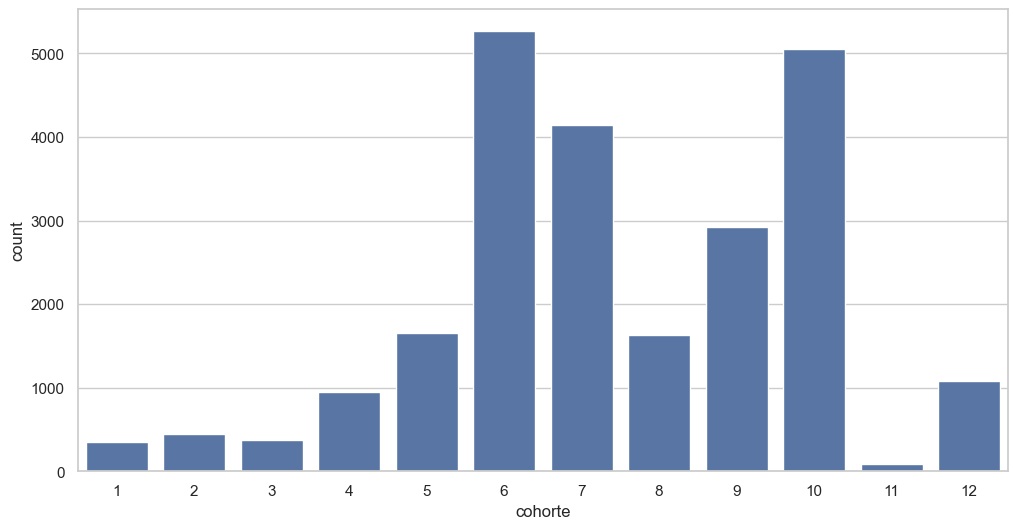

In [588]:
# usando seaborn
sns.countplot(x=creq_cohortes.cohorte);

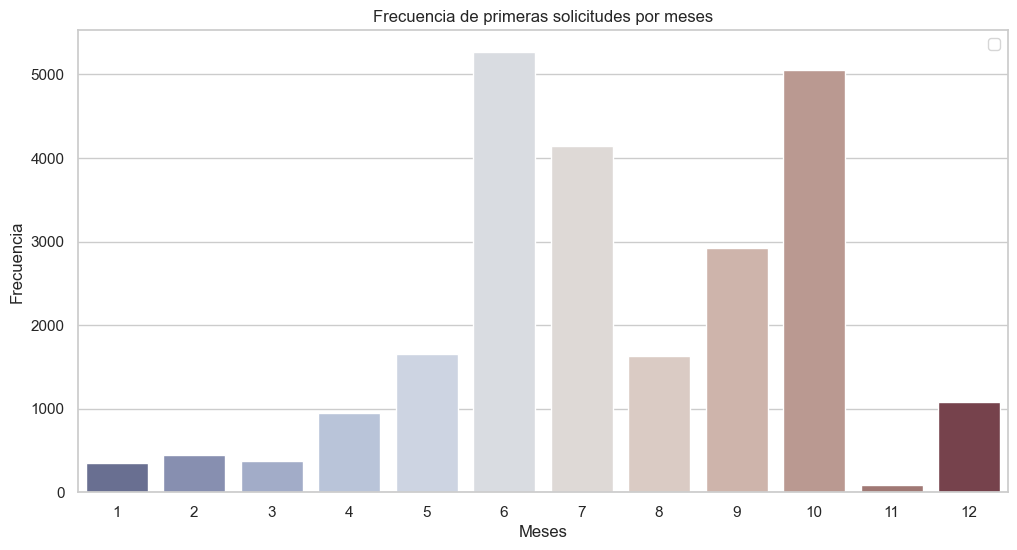

In [589]:
sns.countplot(data=creq_cohortes,x='cohorte',hue='cohorte', palette="coolwarm",saturation=0.3);
plt.xlabel('Meses')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de primeras solicitudes por meses')
plt.legend([])
plt.show()

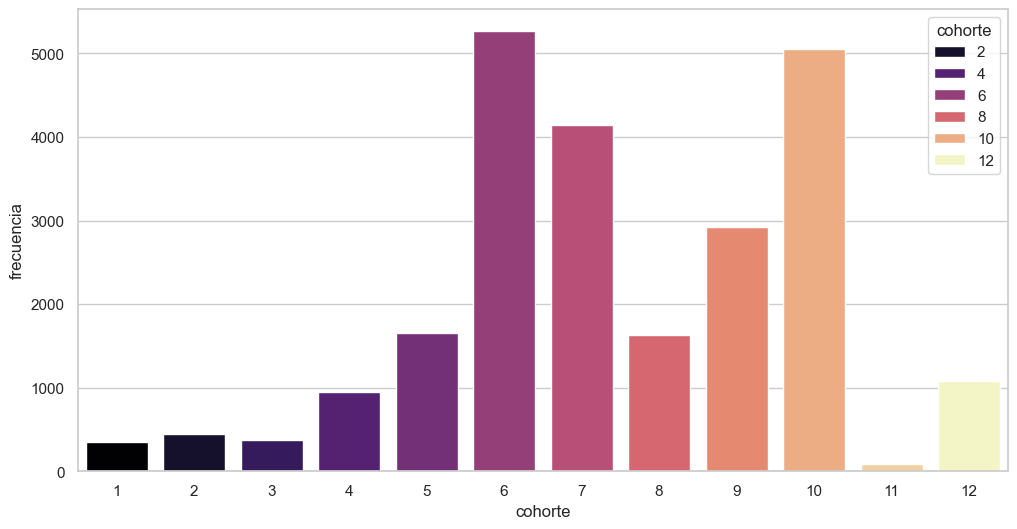

In [590]:
# probando barplot
sns.barplot(data=freq,x="cohorte", y="frecuencia",hue="cohorte", palette="magma", errorbar=None);

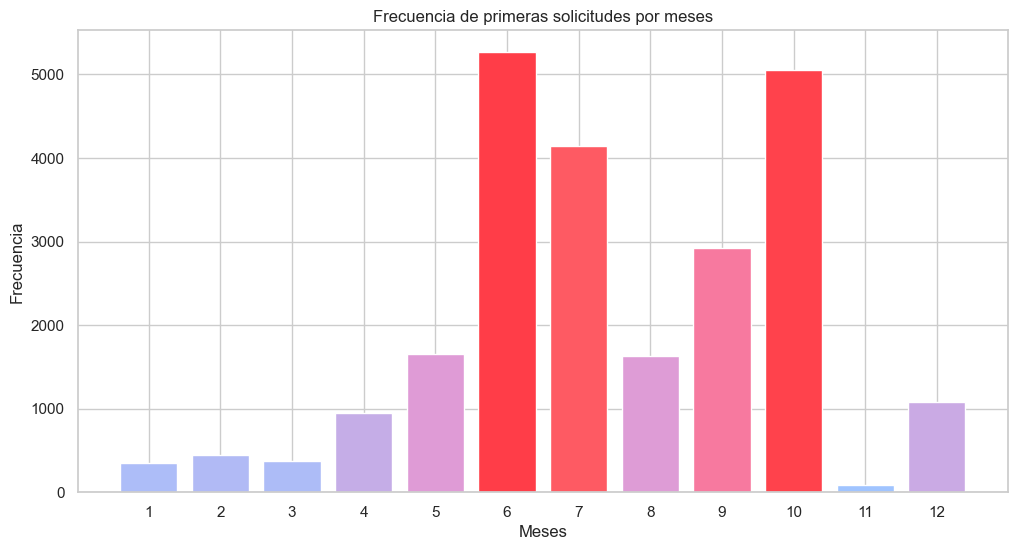

In [591]:
# Usando matplotlib
from matplotlib.colors import LinearSegmentedColormap as ColorMap

rango_colores = [
    "#A0C4FF",  # Azul pastel
    "#B6B7F2",
    "#C8ABE5",
    "#DB9FD8",
    "#E693D2",
    "#F287BB",
    "#F779A0",
    "#FA6D88",
    "#FD6171",
    "#FF555A",
    "#FF4951",
    "#FF3D48"   # Rojo pastel
]

mapa_color = ColorMap.from_list('custom_cmap', rango_colores, N=len(creq_cohortes))
n = creq_cohortes['cohorte'].value_counts()
norm = plt.Normalize(n.min(), n.max())
plt.bar(n.index, n.values, color=mapa_color(norm(n.values)))

plt.xlabel('Meses')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de primeras solicitudes por meses')
plt.legend([], frameon=False) 
plt.xticks(ticks=[x for x in range(1, 13)])
plt.show()

In [592]:
# Hay más peticiones en los meses antes del verano, para gastar en julio o agosto, y también para 
# ayudar a los gastos del verano en septiembre y octubre. Luego ya un repunte para navidad.

In [593]:
# Ver si los estados principales tienen algún efecto según la cohorte
creq_cohortes.groupby("status")["cohorte"].agg("count")

status
active                      59
canceled                    33
direct_debit_rejected      831
direct_debit_sent           34
money_back               16397
rejected                  6568
transaction_declined        47
Name: cohorte, dtype: int64

<Axes: xlabel='status', ylabel='count'>

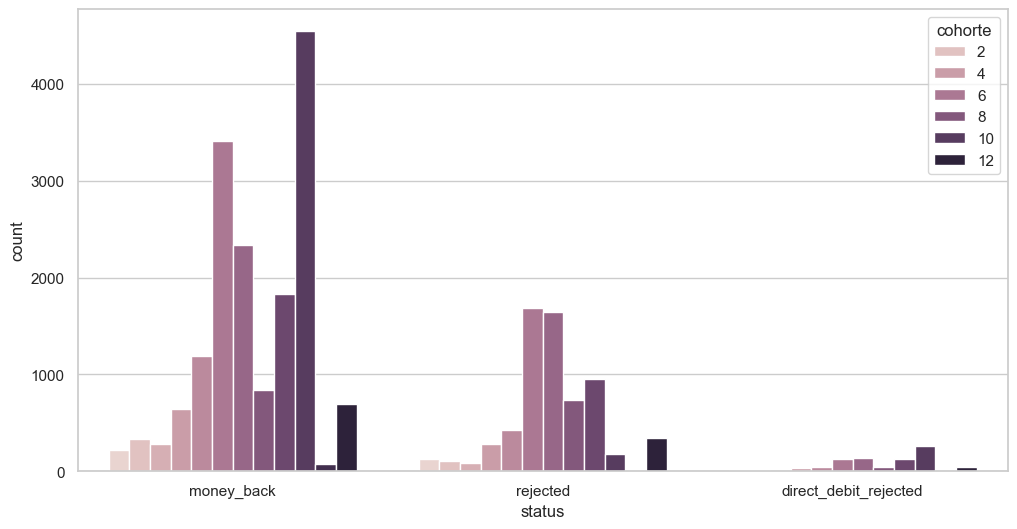

In [594]:
sns.countplot(x="status", hue="cohorte", data=creq_cohortes, order=['money_back','rejected','direct_debit_rejected'])

In [595]:
# El patrón es similar para los casos que hay préstamo y el usuario devuelve el dinero, 
# pero se rechazan menos después de verano

<Axes: xlabel='status', ylabel='count'>

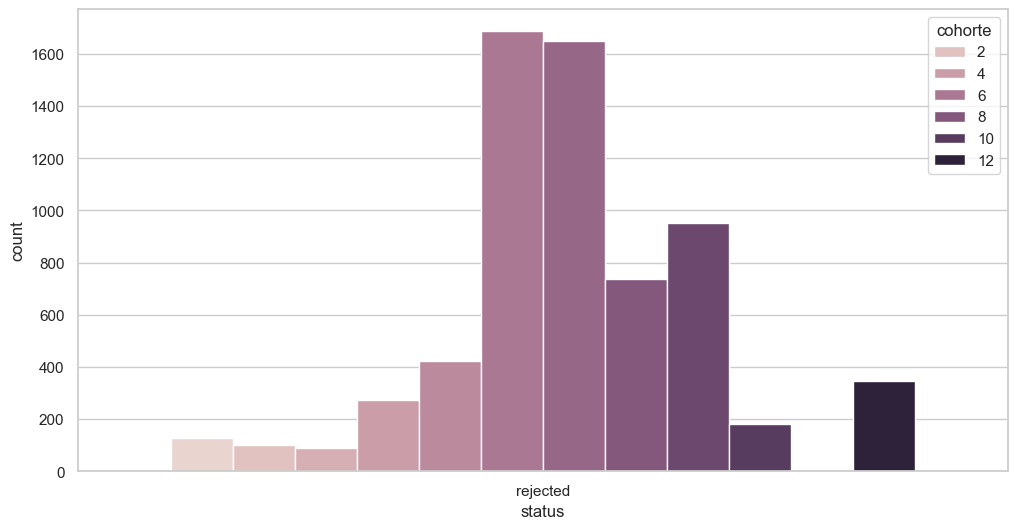

In [596]:
sns.countplot(x="status", hue="cohorte", data=creq_cohortes, order=['rejected'],)

In [597]:
rejected=creq_cohortes.groupby("cohorte").agg(cohorte_count=("cohorte", "size"),status_count=("status", lambda x: (x == "rejected").sum()))
rejected["rejection_ratio"] = (rejected["status_count"] / rejected["cohorte_count"]) * 100
rejected["rejection_ratio"] = rejected["rejection_ratio"].apply(lambda x: f'{x:.1f}%')
rejected

,cohorte_count,status_count,rejection_ratio
cohorte,,,
1,354,128,36.2%
2,441,101,22.9%
3,371,88,23.7%
4,952,275,28.9%
5,1660,423,25.5%
6,5266,1687,32.0%
7,4147,1648,39.7%
8,1632,737,45.2%
9,2925,953,32.6%


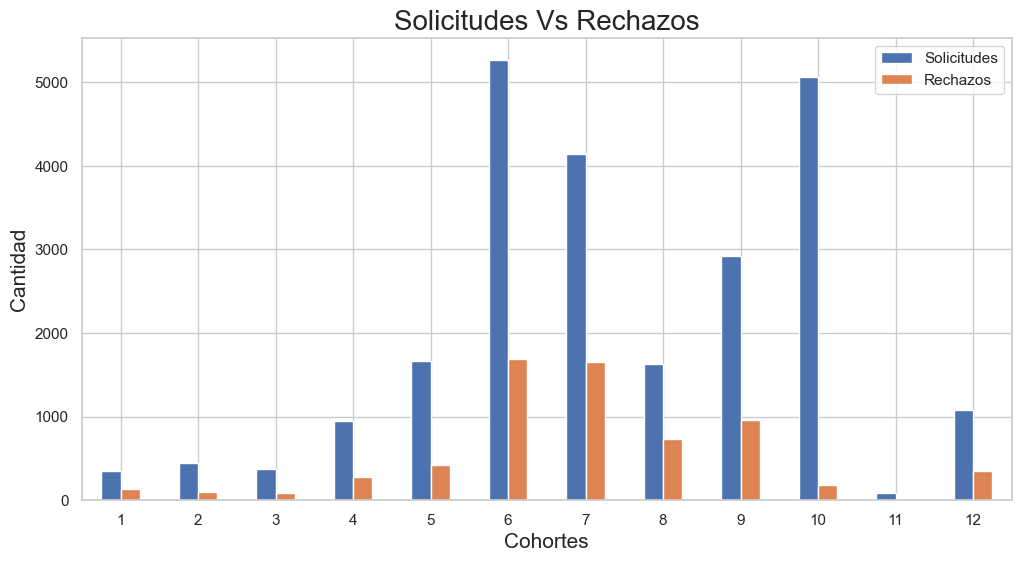

In [598]:
rejected.plot(kind="bar")
plt.xticks(rotation=0.5)
plt.xlabel("Cohortes", fontsize=15)
plt.ylabel("Cantidad", fontsize=15)
plt.title("Solicitudes Vs Rechazos", fontsize=20)
plt.legend(['Solicitudes', 'Rechazos'])
plt.show()

In [599]:
# Para usar las cohortes con las tablas vinculadas redefinimos df
df=pd.merge(creq_cohortes, fees, left_on='id', right_on='cash_request_id', how='left', suffixes = ["_creq", "_fees"])
print(len(df))
df.head(2)

32094


,id_creq,amount,status_creq,created_at_creq,updated_at_creq,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,...,status_fees,category,total_amount,reason,created_at_fees,updated_at_fees,paid_at,from_date,to_date,charge_moment
0,1302,100.0,rejected,2020-04-20 15:50:21.187257+00:00,2020-04-22 12:03:34.439811+00:00,34.0,2020-04-22 12:03:34.434712+00,NaN,2020-04-27 15:50:21.18689+00,NaN,...,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN
1,150,100.0,rejected,2019-12-13 20:27:38.106778+00:00,2019-12-18 15:20:41.722482+00:00,35.0,2019-12-18 15:20:41.715612+00,NaN,2019-12-20 20:27:38.106319+00,NaN,...,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN


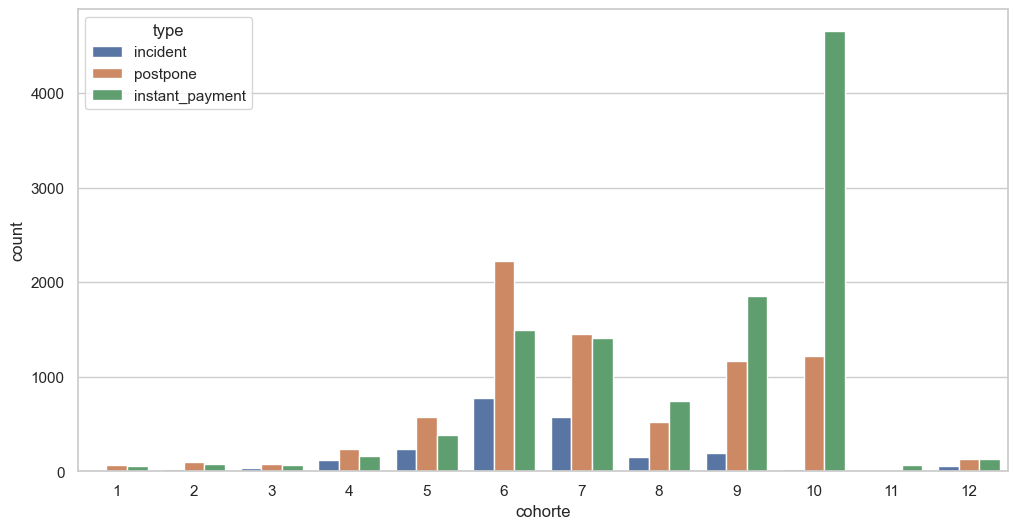

In [600]:
# Revisemos tipos para ver incidentes
sns.countplot(data=df,x='cohorte',hue='type');

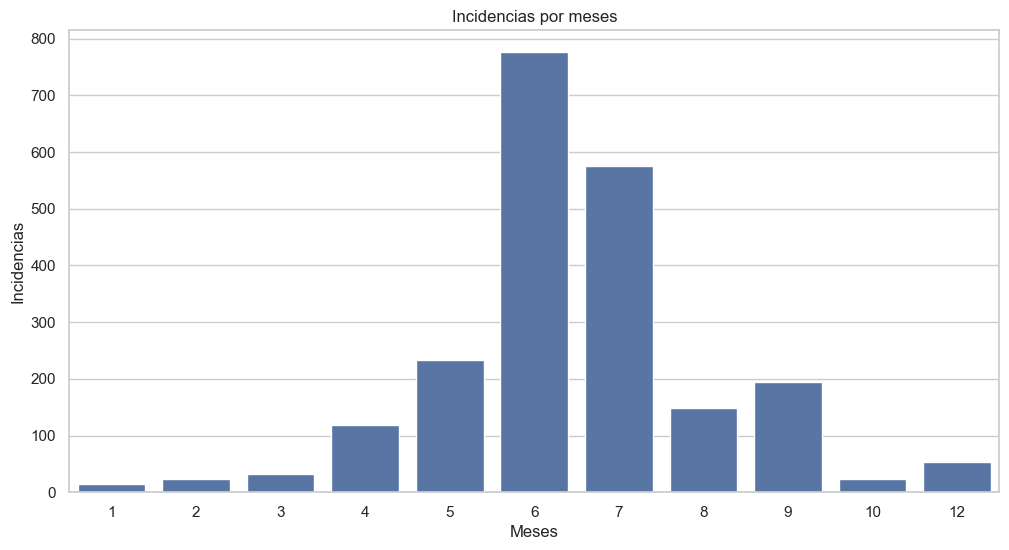

In [601]:
filtro_df=df[df['type'] =='incident']
sns.countplot(data=filtro_df,x='cohorte',hue='type');
plt.legend([], frameon=False) 
plt.title('Incidencias por meses')
plt.xlabel('Meses')
plt.ylabel('Incidencias')
plt.show()


In [757]:
incidentes1=df.groupby("cohorte").agg(Solicitudes=("cohorte", "size"),Incidencias=("type", lambda x: (x == "incident").sum()))
incidentes1["Tasa"] = (incidentes1["Incidencias"] / incidentes1["Solicitudes"]) * 100
incidentes1["Tasa"] = incidentes1["Tasa"].apply(lambda x: f'{x:.1f}%')
#incidentes = incidentes.reset_index()
incidentes1

,Solicitudes,Incidencias,Tasa
cohorte,,,
1,411,15,3.6%
2,528,24,4.5%
3,447,32,7.2%
4,1199,119,9.9%
5,2219,234,10.5%
6,7474,776,10.4%
7,5702,576,10.1%
8,2266,149,6.6%
9,4264,195,4.6%


<Axes: xlabel='cohorte'>

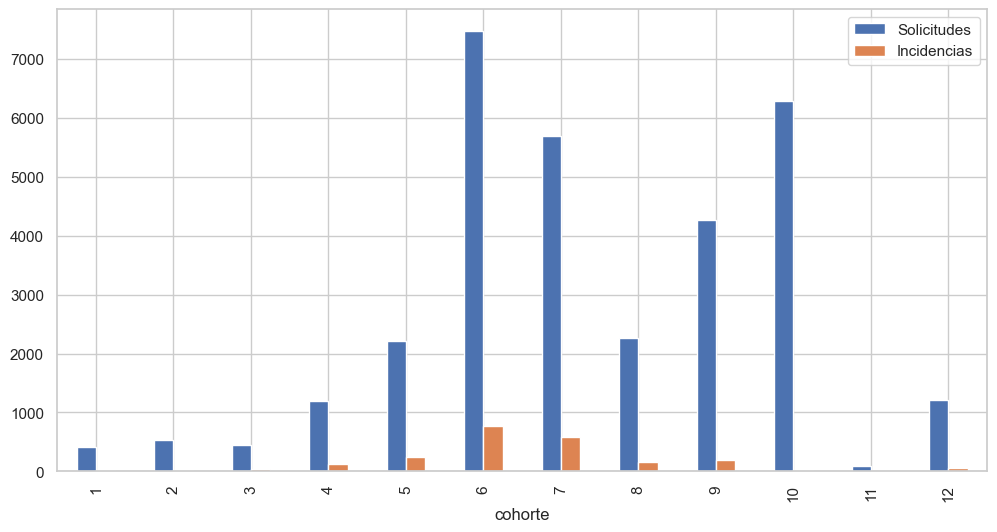

In [759]:
incidentes1.plot(kind="bar")

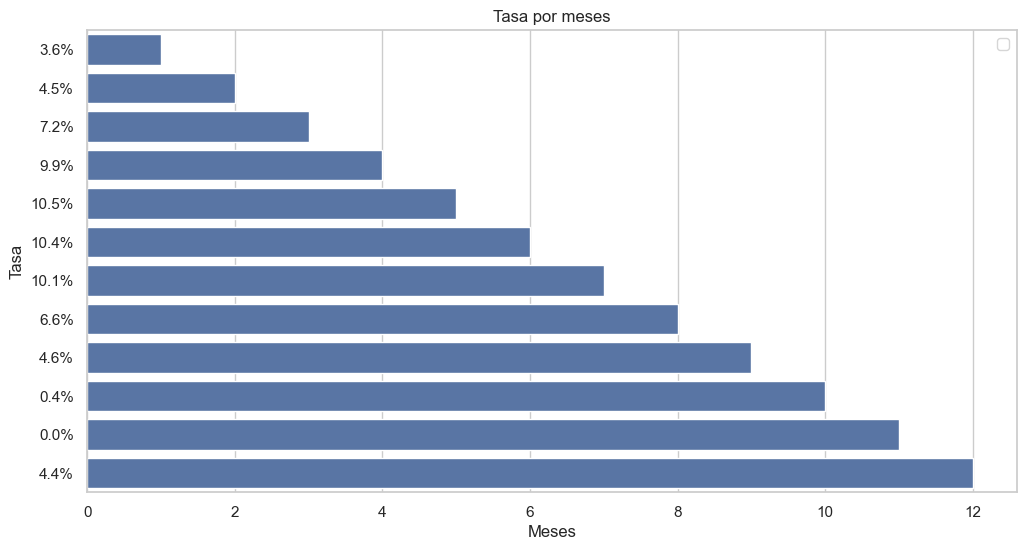

In [761]:
#sns.barplot(data=incidentes,x='cohorte',hue='Incidencias', palette="coolwarm",saturation=0.3);
sns.barplot(data=incidentes1, x='cohorte', y='Tasa')
plt.xlabel('Meses')
plt.ylabel('Tasa')
plt.title('Tasa por meses')
plt.legend([])
plt.show()

In [605]:
# Buscamos incidentes, pero hay que ver si para una solicitud hay más de uno
varios_incidentes=df.groupby("id_creq").agg(icount=("type", lambda x: (x == "incident").sum()))
varios_incidentes[varios_incidentes["icount"] > 1].head(2)

,icount
id_creq,
1625,4
1655,4


In [606]:
# Vemos que sí
# Miramos uno, y es un incidente de impago que se alarga en el tiempo, habría que considerarlo como uno
df.loc[df["id_creq"] == 1625,['id_creq','type','status_fees','category','created_at_fees']].sort_values("created_at_fees")


,id_creq,type,status_fees,category,created_at_fees
4499,1625,postpone,accepted,NaN,2020-05-30 18:45:47.396092+00:00
4500,1625,incident,cancelled,rejected_direct_debit,2020-07-15 23:21:13.197842+00:00
4501,1625,incident,cancelled,month_delay_on_payment,2020-08-14 23:36:28.246633+00:00
4498,1625,incident,cancelled,month_delay_on_payment,2020-09-13 23:51:03.140285+00:00
4502,1625,incident,rejected,month_delay_on_payment,2020-10-14 01:05:20.953707+00:00


In [755]:
# Sub DataFrame con la cohorte
incidentes2=df.groupby(["id_creq",'cohorte']).agg(hay=("type", lambda x: np.any(x == "incident")))
incidentes2=incidentes2[incidentes2["hay"] == True]
incidentes2=incidentes2.groupby("cohorte").size().reset_index(name='Incidencias')
incidentes2

,cohorte,Incidencias
0,1,9
1,2,15
2,3,22
3,4,69
4,5,156
5,6,543
6,7,405
7,8,128
8,9,195
9,10,23


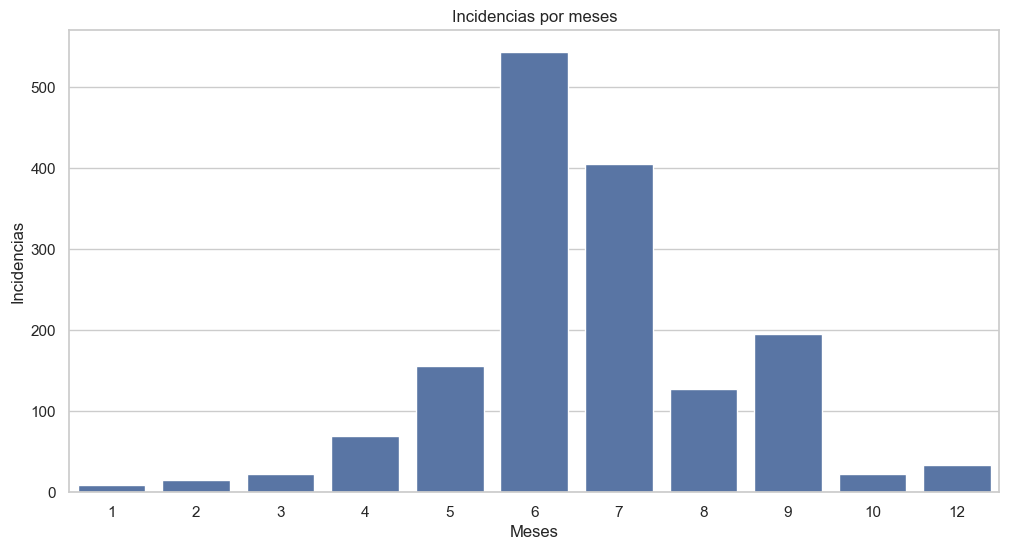

In [721]:
sns.barplot(data=incidentes2,x='cohorte',y='Incidencias');
plt.legend([], frameon=False) 
plt.title('Incidencias por meses')
plt.xlabel('Meses')
plt.ylabel('Incidencias')
plt.show()

In [763]:
incidentes2["Tasa"] = 0
incidentes3=pd.merge(incidentes1, incidentes2, on='cohorte', how='left', suffixes = ["_1", "_2"])
incidentes3

,cohorte,Solicitudes,Incidencias_1,Tasa_1,Incidencias_2,Tasa_2
0,1,411,15,3.6%,9.0,0.0
1,2,528,24,4.5%,15.0,0.0
2,3,447,32,7.2%,22.0,0.0
3,4,1199,119,9.9%,69.0,0.0
4,5,2219,234,10.5%,156.0,0.0
5,6,7474,776,10.4%,543.0,0.0
6,7,5702,576,10.1%,405.0,0.0
7,8,2266,149,6.6%,128.0,0.0
8,9,4264,195,4.6%,195.0,0.0
9,10,6289,23,0.4%,23.0,0.0


In [765]:
incidentes3["Tasa_2"] = (incidentes3["Incidencias_2"] /incidentes3["Solicitudes"]) * 100
incidentes3["Tasa_2"] = incidentes3["Tasa_2"].apply(lambda x: f'{x:.1f}%')
#incidentes = incidentes.reset_index()
incidentes3

,cohorte,Solicitudes,Incidencias_1,Tasa_1,Incidencias_2,Tasa_2
0,1,411,15,3.6%,9.0,2.2%
1,2,528,24,4.5%,15.0,2.8%
2,3,447,32,7.2%,22.0,4.9%
3,4,1199,119,9.9%,69.0,5.8%
4,5,2219,234,10.5%,156.0,7.0%
5,6,7474,776,10.4%,543.0,7.3%
6,7,5702,576,10.1%,405.0,7.1%
7,8,2266,149,6.6%,128.0,5.6%
8,9,4264,195,4.6%,195.0,4.6%
9,10,6289,23,0.4%,23.0,0.4%


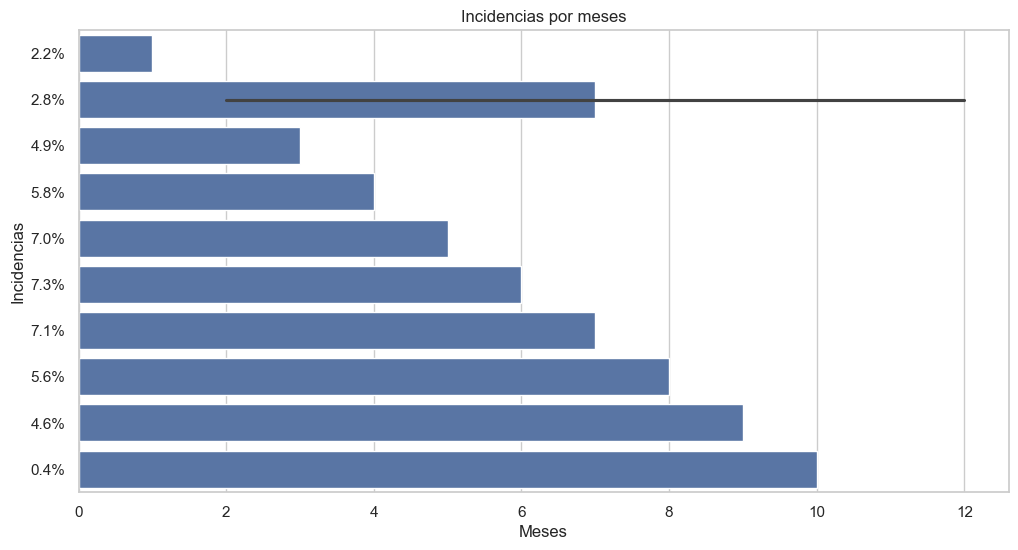

In [753]:
sns.barplot(data=incidentes3,x='cohorte',y='Tasa_2');
plt.legend([], frameon=False) 
plt.title('Incidencias por meses')
plt.xlabel('Meses')
plt.ylabel('Incidencias')
plt.show()

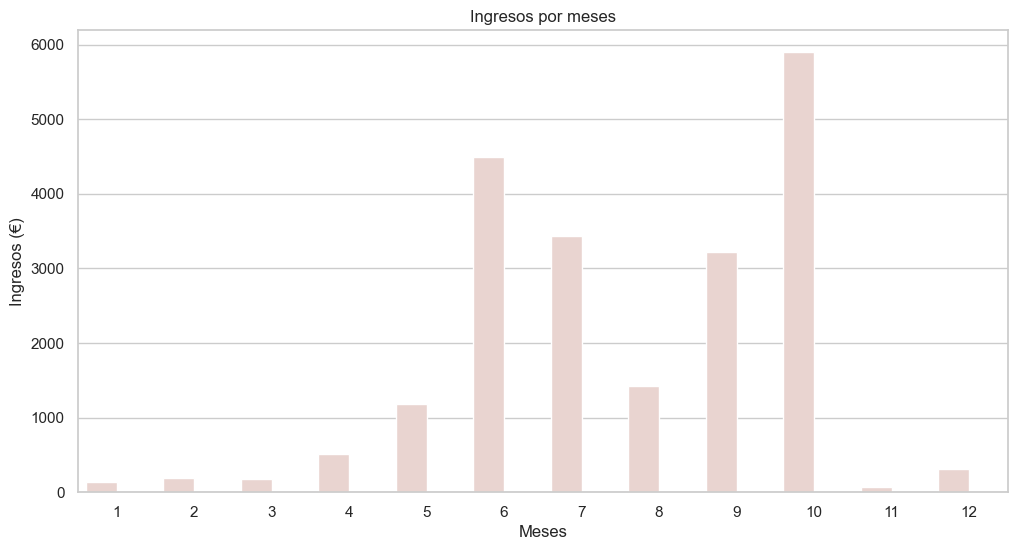

In [817]:
plt.clf()
sns.countplot(data=df,x='cohorte',hue='total_amount')
plt.legend([], frameon=False) 
plt.title('Ingresos por meses')
plt.xlabel('Meses')
plt.ylabel('Ingresos (€)')
plt.show()

In [819]:
df[["cohorte", "total_amount"]].groupby("cohorte").sum().style.format({'total_amount': '{:,.0f}€'})

,total_amount
cohorte,
1,655€
2,965€
3,870€
4,"2,565€"
5,"5,930€"
6,"22,495€"
7,"17,175€"
8,"7,095€"
9,"16,100€"


In [827]:
ingresos=df.groupby("cohorte").agg(Solicitudes=("cohorte", "size"),Ingresos=("total_amount", "sum"))
ingresos

,Solicitudes,Ingresos
cohorte,,
1,411,655.0
2,528,965.0
3,447,870.0
4,1199,2565.0
5,2219,5930.0
6,7474,22495.0
7,5702,17175.0
8,2266,7095.0
9,4264,16100.0


<Axes: xlabel='cohorte'>

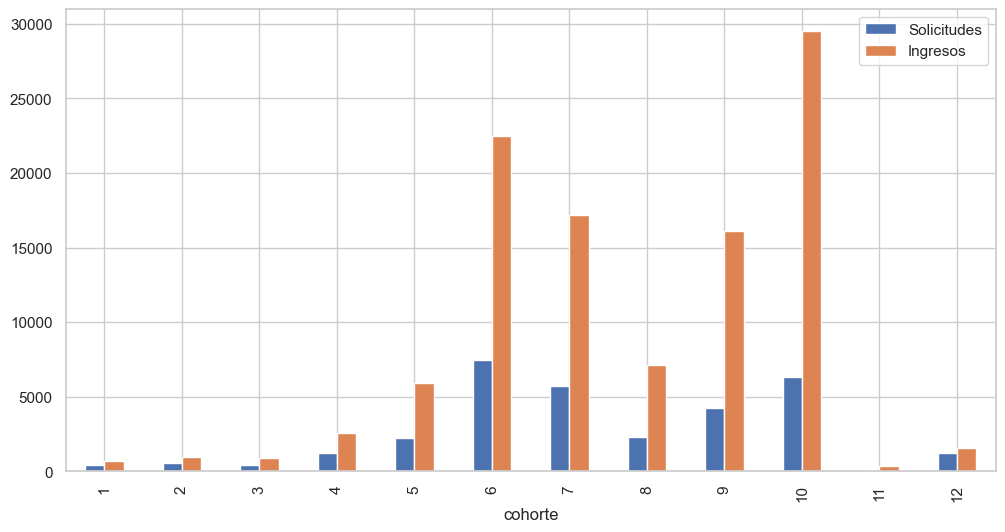

In [829]:
ingresos.plot(kind="bar")

In [895]:
def min_max_scaling(series):
    return (series - series.min()) / (series.max() - series.min())
    
ingresos2=pd.merge(ingresos, incidentes3, on='cohorte', how='left', suffixes = ["_ing", "_inc"])
ingresos2.drop(columns=["Solicitudes_inc", "Solicitudes_ing",'Incidencias_1','Tasa_1','Tasa_2'], inplace=True)
ingresos2['Ingresos']=min_max_scaling(ingresos2['Ingresos'])
ingresos2['Incidencias_2']=min_max_scaling(ingresos2['Incidencias_2'])
ingresos2.set_index("cohorte", inplace=True)
ingresos2

,Ingresos,Incidencias_2
cohorte,,
1,0.009274,0.000000
2,0.019921,0.011236
3,0.016658,0.024345
4,0.074875,0.112360
5,0.190452,0.275281
6,0.759402,1.000000
7,0.576679,0.741573
8,0.230465,0.222846
9,0.539756,0.348315


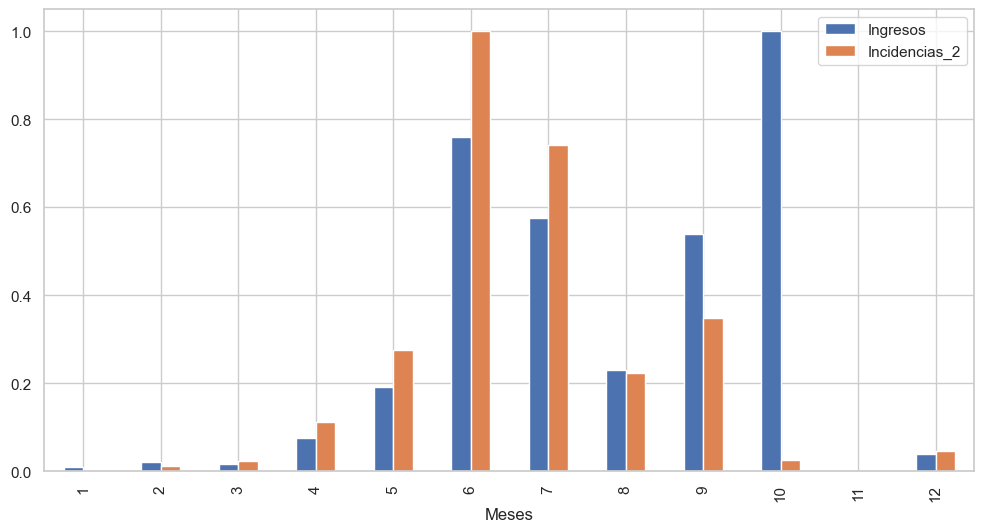

In [897]:
ingresos2.plot(kind="bar")
plt.xlabel('Meses')
plt.show()